### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
import holidays

from pathlib import Path

# import torch

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using device:", device)

In [2]:
data_dir = Path("../Test-Task-for-DS-time-series-forecasting-2026-01/data")
sales = data_dir / "ts_hist.csv"

print("sales:", sales.exists())

sales: True


### DATA

In [3]:
df = pd.read_csv(sales)
print(df.shape, "\n")
df.head()

(239511, 11) 



,date,index,store_id,cat_id,dept_id,item_id,event_name_1,event_type_1,event_name_2,event_type_2,qnt
0,2014-01-01,0_FOODS_1_0,0,FOODS,FOODS_1,0,NewYear,National,NaN,NaN,23
1,2014-01-02,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,28
2,2014-01-03,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,43
3,2014-01-04,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,33
4,2014-01-05,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,32


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 239511 entries, 0 to 239510
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   date          239511 non-null  str  
 1   index         239511 non-null  str  
 2   store_id      239511 non-null  int64
 3   cat_id        239511 non-null  str  
 4   dept_id       239511 non-null  str  
 5   item_id       239511 non-null  int64
 6   event_name_1  19586 non-null   str  
 7   event_type_1  19586 non-null   str  
 8   event_name_2  510 non-null     str  
 9   event_type_2  510 non-null     str  
 10  qnt           239511 non-null  int64
dtypes: int64(3), str(8)
memory usage: 20.1 MB


In [5]:
for name in df.columns:
    n_unique = df[name].nunique()
    n_missing = df[name].isna().sum()
    dtype = df[name].dtype
    print(f"{name:15} | {n_unique:10} | {n_missing:10} | {dtype}")

date            |        866 |          0 | str
index           |        405 |          0 | str
store_id        |          4 |          0 | int64
cat_id          |          3 |          0 | str
dept_id         |          7 |          0 | str
item_id         |        181 |          0 | int64
event_name_1    |         30 |     219925 | str
event_type_1    |          4 |     219925 | str
event_name_2    |          2 |     239001 | str
event_type_2    |          2 |     239001 | str
qnt             |        234 |          0 | int64


In [6]:
columsns = ['cat_id', 'store_id', 'dept_id', 'event_name_1', 'event_name_2', 'event_type_1', 'event_type_2']
for val in columsns:
    print(f"{val}: {df[val].unique()}")

cat_id: <StringArray>
['FOODS', 'HOBBIES', 'HOUSEHOLD']
Length: 3, dtype: str
store_id: [0 2 1 3]
dept_id: <StringArray>
[    'FOODS_1',     'FOODS_2',     'FOODS_3',   'HOBBIES_1',   'HOBBIES_2',
 'HOUSEHOLD_1', 'HOUSEHOLD_2']
Length: 7, dtype: str
event_name_1: <StringArray>
[            'NewYear',                   nan,   'OrthodoxChristmas',
 'MartinLutherKingDay',       'ValentinesDay',       'PresidentsDay',
           'LentStart',           'LentWeek2',              'Easter',
          'Pesach End',       'Cinco De Mayo',        'Mother's day',
         'MemorialDay',      'NBAFinalsStart',        'NBAFinalsEnd',
     'IndependenceDay',         'Eid al-Fitr',            'LaborDay',
           'EidAlAdha',         'ColumbusDay',           'Halloween',
         'VeteransDay',        'Thanksgiving',        'Chanukah End',
           'SuperBowl',           'Purim End',       'StPatricksDay',
      'OrthodoxEaster',      'Ramadan starts',        'Father's day',
           'Christmas'

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,index,store_id,cat_id,dept_id,item_id,event_name_1,event_type_1,event_name_2,event_type_2,qnt
0,2014-01-01,0_FOODS_1_0,0,FOODS,FOODS_1,0,NewYear,National,NaN,NaN,23
1,2014-01-02,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,28
2,2014-01-03,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,43
3,2014-01-04,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,33
4,2014-01-05,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,32


In [8]:
df.sample(5)

,date,index,store_id,cat_id,dept_id,item_id,event_name_1,event_type_1,event_name_2,event_type_2,qnt
132605,2016-02-07,3_HOBBIES_1_82,3,HOBBIES,HOBBIES_1,82,SuperBowl,Sporting,NaN,NaN,2
116444,2014-05-27,2_FOODS_3_68,2,FOODS,FOODS_3,68,NaN,NaN,NaN,NaN,35
66891,2014-12-08,1_FOODS_2_43,1,FOODS,FOODS_2,43,NaN,NaN,NaN,NaN,2
76643,2014-06-24,1_FOODS_2_48,1,FOODS,FOODS_2,48,NaN,NaN,NaN,NaN,4
115098,2015-02-20,0_FOODS_3_68,0,FOODS,FOODS_3,68,NaN,NaN,NaN,NaN,20


In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 239511 entries, 0 to 239510
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          239511 non-null  datetime64[us]
 1   index         239511 non-null  str           
 2   store_id      239511 non-null  int64         
 3   cat_id        239511 non-null  str           
 4   dept_id       239511 non-null  str           
 5   item_id       239511 non-null  int64         
 6   event_name_1  19586 non-null   str           
 7   event_type_1  19586 non-null   str           
 8   event_name_2  510 non-null     str           
 9   event_type_2  510 non-null     str           
 10  qnt           239511 non-null  int64         
dtypes: datetime64[us](1), int64(3), str(7)
memory usage: 20.1 MB


In [10]:
GLOBAL_START = df['date'].min()
GLOBAL_END = df['date'].max()
print(f"Global start date: {GLOBAL_START}, Global end date: {GLOBAL_END}")

Global start date: 2014-01-01 00:00:00, Global end date: 2016-05-15 00:00:00


In [11]:
df = df.sort_values(by=['index', 'date']).reset_index(drop=True)
df.head()

,date,index,store_id,cat_id,dept_id,item_id,event_name_1,event_type_1,event_name_2,event_type_2,qnt
0,2014-01-01,0_FOODS_1_0,0,FOODS,FOODS_1,0,NewYear,National,NaN,NaN,23
1,2014-01-02,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,28
2,2014-01-03,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,43
3,2014-01-04,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,33
4,2014-01-05,0_FOODS_1_0,0,FOODS,FOODS_1,0,NaN,NaN,NaN,NaN,32


In [12]:
df.duplicated(subset=['index', 'date']).sum()

np.int64(0)

### Exploratory Data Analysis

In [13]:
df_kernel = df[['index', 'date', 'qnt']]
df_kernel.rename(columns={'qnt': 'y', 'index': 'unique_id'}, inplace=True)
df_kernel.info()

<class 'pandas.DataFrame'>
RangeIndex: 239511 entries, 0 to 239510
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   unique_id  239511 non-null  str           
 1   date       239511 non-null  datetime64[us]
 2   y          239511 non-null  int64         
dtypes: datetime64[us](1), int64(1), str(1)
memory usage: 5.5 MB


In [14]:
df_kernel.head()

,unique_id,date,y
0,0_FOODS_1_0,2014-01-01,23
1,0_FOODS_1_0,2014-01-02,28
2,0_FOODS_1_0,2014-01-03,43
3,0_FOODS_1_0,2014-01-04,33
4,0_FOODS_1_0,2014-01-05,32


In [15]:
# Check time differences
gap_counts = df_kernel.groupby('unique_id')['date'].diff().value_counts()
gap_counts.sort_index()

date
1 days      204014
2 days       19812
3 days        6660
4 days        3070
5 days        1650
             ...  
286 days         1
313 days         1
343 days         1
357 days         1
474 days         1
Name: count, Length: 129, dtype: int64

In [16]:
df_kernel.groupby('date')['y'].sum().reset_index(drop=True)
df_kernel

,unique_id,date,y
0,0_FOODS_1_0,2014-01-01,23
1,0_FOODS_1_0,2014-01-02,28
2,0_FOODS_1_0,2014-01-03,43
3,0_FOODS_1_0,2014-01-04,33
4,0_FOODS_1_0,2014-01-05,32
...,...,...,...
239506,3_HOUSEHOLD_2_180,2016-05-11,3
239507,3_HOUSEHOLD_2_180,2016-05-12,2
239508,3_HOUSEHOLD_2_180,2016-05-13,2
239509,3_HOUSEHOLD_2_180,2016-05-14,1


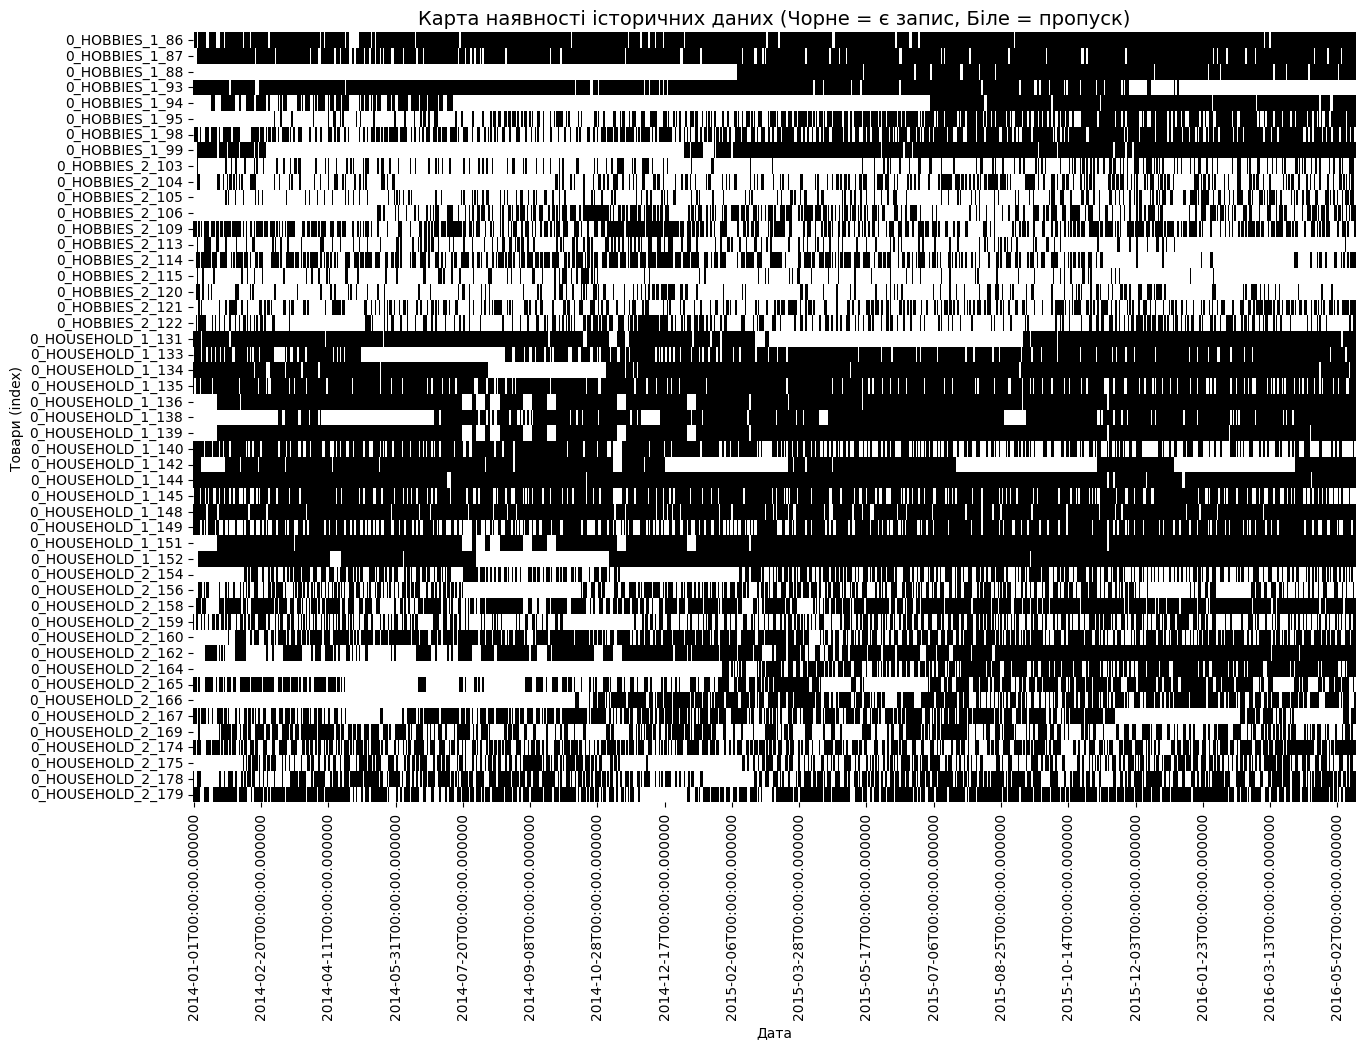

In [17]:
# Візуалізація пропусків у даних за допомогою теплової карти
unique_items = df_kernel['unique_id'].unique()[51:100] 
df_sample = df_kernel[df_kernel['unique_id'].isin(unique_items)].copy()

# 2. Створення матриці (Pivot Table)
# Рядки = Товари, Стовпці = Дати, Значення = Є дані чи ні
# pivot автоматично створить NaN (порожнечу) там, де не було рядків у датасеті
matrix = df_sample.pivot(index='unique_id', columns='date', values='y')

# 3. Перетворення на булеву матрицю (1 = Є дані, 0 = Немає)
# Це потрібно, щоб колір залежав тільки від наявності запису, а не від кількості продажів
sparsity_matrix = matrix.notna().astype(int)

# 4. Візуалізація
plt.figure(figsize=(15, 10))

# Використовуємо cmap='binary', де 0 (немає даних) буде білим, а 1 (є дані) — чорним
sns.heatmap(sparsity_matrix, 
            cbar=False,           # Прибираю шкалу кольорів, вона тут не треба
            cmap='binary',        # Чорно-біла палітра
            xticklabels=50,       # Показувати дату тільки кожні 50 днів, щоб не забивати вісь
            yticklabels=True)     # Показувати назви товарів

plt.title('Карта наявності історичних даних (Чорне = є запис, Біле = пропуск)', fontsize=14)
plt.xlabel('Дата')
plt.ylabel('Товари (index)')
plt.show()

In [18]:
def fill_daily_gaps(one_series):
    uid = one_series.name
    one_series = one_series.sort_values(by='date')
    full_range = pd.date_range(GLOBAL_START, GLOBAL_END, freq='D')
    one_series = one_series.set_index('date').reindex(full_range)
    # one_series["is_observed"] = one_series["y"].notna().astype("int8")  # Додатковий стовпець для позначки наявності спостереження
    one_series['y'] = one_series['y'].fillna(0).astype('int64')
    one_series['unique_id'] = uid
    one_series = one_series.reset_index().rename(columns={'index': 'date'})
    return one_series

In [19]:
df_filled = (
    df_kernel.groupby('unique_id', group_keys=False).apply(fill_daily_gaps).reset_index(drop=True)
)
# df_filled["is_observed"].value_counts(normalize=True)

In [20]:
# df_filled = df_filled[['unique_id', 'date', 'y', 'is_observed']]
df_filled = df_filled[['unique_id', 'date', 'y']]
df_filled

,unique_id,date,y
0,0_FOODS_1_0,2014-01-01,23
1,0_FOODS_1_0,2014-01-02,28
2,0_FOODS_1_0,2014-01-03,43
3,0_FOODS_1_0,2014-01-04,33
4,0_FOODS_1_0,2014-01-05,32
...,...,...,...
350725,3_HOUSEHOLD_2_180,2016-05-11,3
350726,3_HOUSEHOLD_2_180,2016-05-12,2
350727,3_HOUSEHOLD_2_180,2016-05-13,2
350728,3_HOUSEHOLD_2_180,2016-05-14,1


In [21]:
df_filled['day_of_week'] = df_filled['date'].dt.dayofweek
df_filled['month'] = df_filled['date'].dt.month
df_filled['day_of_month'] = df_filled['date'].dt.day
df_filled['year'] = df_filled['date'].dt.year
df_filled['week_of_year'] = df_filled['date'].dt.isocalendar().week
df_filled['week_of_year'] = df_filled['week_of_year'].astype('int16')
df_filled['is_weekend'] = df_filled['day_of_week'].isin([5, 6]).astype('int8')

In [22]:
df_filled

,unique_id,date,y,day_of_week,month,day_of_month,year,week_of_year,is_weekend
0,0_FOODS_1_0,2014-01-01,23,2,1,1,2014,1,0
1,0_FOODS_1_0,2014-01-02,28,3,1,2,2014,1,0
2,0_FOODS_1_0,2014-01-03,43,4,1,3,2014,1,0
3,0_FOODS_1_0,2014-01-04,33,5,1,4,2014,1,1
4,0_FOODS_1_0,2014-01-05,32,6,1,5,2014,1,1
...,...,...,...,...,...,...,...,...,...
350725,3_HOUSEHOLD_2_180,2016-05-11,3,2,5,11,2016,19,0
350726,3_HOUSEHOLD_2_180,2016-05-12,2,3,5,12,2016,19,0
350727,3_HOUSEHOLD_2_180,2016-05-13,2,4,5,13,2016,19,0
350728,3_HOUSEHOLD_2_180,2016-05-14,1,5,5,14,2016,19,1


In [23]:
def first_notnan(series):
    series = series.dropna()
    return series.iloc[0] if len(series) else pd.NA

In [24]:
df_calendar = df.groupby('date').agg({
    'event_name_1': first_notnan,
    'event_name_2': first_notnan,
    'event_type_1': first_notnan,
    'event_type_2': first_notnan,
}).reset_index()

In [25]:
df_calendar

,date,event_name_1,event_name_2,event_type_1,event_type_2
0,2014-01-01,NewYear,NaN,National,NaN
1,2014-01-02,NaN,NaN,NaN,NaN
2,2014-01-03,NaN,NaN,NaN,NaN
3,2014-01-04,NaN,NaN,NaN,NaN
4,2014-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...
861,2016-05-11,NaN,NaN,NaN,NaN
862,2016-05-12,NaN,NaN,NaN,NaN
863,2016-05-13,NaN,NaN,NaN,NaN
864,2016-05-14,NaN,NaN,NaN,NaN


In [26]:
df_calendar['date'].duplicated().sum()

np.int64(0)

In [27]:
df_merged = pd.merge(df_filled, df_calendar, on='date', how='left')
df_merged

,unique_id,date,y,day_of_week,month,day_of_month,year,week_of_year,is_weekend,event_name_1,event_name_2,event_type_1,event_type_2
0,0_FOODS_1_0,2014-01-01,23,2,1,1,2014,1,0,NewYear,NaN,National,NaN
1,0_FOODS_1_0,2014-01-02,28,3,1,2,2014,1,0,NaN,NaN,NaN,NaN
2,0_FOODS_1_0,2014-01-03,43,4,1,3,2014,1,0,NaN,NaN,NaN,NaN
3,0_FOODS_1_0,2014-01-04,33,5,1,4,2014,1,1,NaN,NaN,NaN,NaN
4,0_FOODS_1_0,2014-01-05,32,6,1,5,2014,1,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350725,3_HOUSEHOLD_2_180,2016-05-11,3,2,5,11,2016,19,0,NaN,NaN,NaN,NaN
350726,3_HOUSEHOLD_2_180,2016-05-12,2,3,5,12,2016,19,0,NaN,NaN,NaN,NaN
350727,3_HOUSEHOLD_2_180,2016-05-13,2,4,5,13,2016,19,0,NaN,NaN,NaN,NaN
350728,3_HOUSEHOLD_2_180,2016-05-14,1,5,5,14,2016,19,1,NaN,NaN,NaN,NaN


In [28]:
df_merged['is_holiday'] = (df_merged['event_name_1'].notna() | df_merged['event_name_2'].notna()).astype('int8')

df_merged["holiday_name"] = df_merged["event_name_1"].fillna(df_merged["event_name_2"])
df_merged["holiday_type"] = df_merged["event_type_1"].fillna(df_merged["event_type_2"])

df_merged["holiday_name"] = df_merged["holiday_name"].fillna("None")
df_merged["holiday_type"] = df_merged["holiday_type"].fillna("None")

In [29]:
df_merged

,unique_id,date,y,day_of_week,month,day_of_month,year,week_of_year,is_weekend,event_name_1,event_name_2,event_type_1,event_type_2,is_holiday,holiday_name,holiday_type
0,0_FOODS_1_0,2014-01-01,23,2,1,1,2014,1,0,NewYear,NaN,National,NaN,1,NewYear,National
1,0_FOODS_1_0,2014-01-02,28,3,1,2,2014,1,0,NaN,NaN,NaN,NaN,0,None,None
2,0_FOODS_1_0,2014-01-03,43,4,1,3,2014,1,0,NaN,NaN,NaN,NaN,0,None,None
3,0_FOODS_1_0,2014-01-04,33,5,1,4,2014,1,1,NaN,NaN,NaN,NaN,0,None,None
4,0_FOODS_1_0,2014-01-05,32,6,1,5,2014,1,1,NaN,NaN,NaN,NaN,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350725,3_HOUSEHOLD_2_180,2016-05-11,3,2,5,11,2016,19,0,NaN,NaN,NaN,NaN,0,None,None
350726,3_HOUSEHOLD_2_180,2016-05-12,2,3,5,12,2016,19,0,NaN,NaN,NaN,NaN,0,None,None
350727,3_HOUSEHOLD_2_180,2016-05-13,2,4,5,13,2016,19,0,NaN,NaN,NaN,NaN,0,None,None
350728,3_HOUSEHOLD_2_180,2016-05-14,1,5,5,14,2016,19,1,NaN,NaN,NaN,NaN,0,None,None


In [30]:
df_merged = df_merged.drop(columns=['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2'])
df_merged

,unique_id,date,y,day_of_week,month,day_of_month,year,week_of_year,is_weekend,is_holiday,holiday_name,holiday_type
0,0_FOODS_1_0,2014-01-01,23,2,1,1,2014,1,0,1,NewYear,National
1,0_FOODS_1_0,2014-01-02,28,3,1,2,2014,1,0,0,None,None
2,0_FOODS_1_0,2014-01-03,43,4,1,3,2014,1,0,0,None,None
3,0_FOODS_1_0,2014-01-04,33,5,1,4,2014,1,1,0,None,None
4,0_FOODS_1_0,2014-01-05,32,6,1,5,2014,1,1,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
350725,3_HOUSEHOLD_2_180,2016-05-11,3,2,5,11,2016,19,0,0,None,None
350726,3_HOUSEHOLD_2_180,2016-05-12,2,3,5,12,2016,19,0,0,None,None
350727,3_HOUSEHOLD_2_180,2016-05-13,2,4,5,13,2016,19,0,0,None,None
350728,3_HOUSEHOLD_2_180,2016-05-14,1,5,5,14,2016,19,1,0,None,None


In [31]:
year = df_merged['date'].dt.year.unique()   
us_holiday = holidays.US(years=year)
dates_as_date = df_merged['date'].dt.date
df_merged["us_holiday_name"] = dates_as_date.map(us_holiday.get)
df_merged["is_us_holiday"] = df_merged["us_holiday_name"].notna().astype('int8')
df_merged['us_holiday_name'] = df_merged['us_holiday_name'].fillna("None")

In [32]:
(df_merged
 .loc[(df_merged["is_us_holiday"] == 1) & (df_merged["is_holiday"] == 0),
      ["date", "us_holiday_name"]]
 .drop_duplicates()
 .sort_values("date")
)

,date,us_holiday_name
548,2015-07-03,Independence Day (observed)


In [33]:
df_merged['is_any_holiday'] = ((df_merged['is_holiday'] == 1) | (df_merged['is_us_holiday'] == 1)).astype('int8')

h1 = df_merged['holiday_name'].fillna('')
h2 = df_merged['us_holiday_name'].replace('None', '').fillna('')

df_merged['all_holiday_name'] = (h1 + ' | ' + h2).str.strip(' | ')
df_merged['all_holiday_name'] = df_merged['all_holiday_name'].replace('', 'None')

df_merged = df_merged.drop(columns=['us_holiday_name', 'is_us_holiday'])

In [34]:
df_merged.head()

,unique_id,date,y,day_of_week,month,day_of_month,year,week_of_year,is_weekend,is_holiday,holiday_name,holiday_type,is_any_holiday,all_holiday_name
0,0_FOODS_1_0,2014-01-01,23,2,1,1,2014,1,0,1,NewYear,National,1,NewYear | New Year's Day
1,0_FOODS_1_0,2014-01-02,28,3,1,2,2014,1,0,0,None,None,0,None
2,0_FOODS_1_0,2014-01-03,43,4,1,3,2014,1,0,0,None,None,0,None
3,0_FOODS_1_0,2014-01-04,33,5,1,4,2014,1,1,0,None,None,0,None
4,0_FOODS_1_0,2014-01-05,32,6,1,5,2014,1,1,0,None,None,0,None


In [35]:
df_merged = df_merged.drop(columns=['holiday_name', 'is_holiday'])
df_merged["all_holiday_name"] = df_merged["all_holiday_name"].fillna("None")
df_merged["holiday_type"] = df_merged["holiday_type"].fillna("None")
df_merged[["holiday_type", "all_holiday_name"]].isna().sum()

holiday_type        0
all_holiday_name    0
dtype: int64

In [36]:
df_prepared = df_merged.rename(columns={'date': 'ds'}).copy()
df_prepared = df_prepared.sort_values(by=['unique_id', 'ds']).reset_index(drop=True)
df_prepared.to_csv(data_dir / "data_prepared.csv", index=False)
print("Data preparation completed and saved to 'data_prepared.csv'")


Data preparation completed and saved to 'data_prepared.csv'
